In [20]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import re
from getdata import netflix_df

In [31]:
# Variables
min_rating = 7

condensed_df = netflix_df.loc[netflix_df["imdb_score"] >= min_rating]
condensed_df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600
5,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,73424.0,17.617,8.306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5830,ts288861,Let's Eat,SHOW,A food-blogging insurance agent encounters a f...,2021,TV-14,60,"['drama', 'comedy']",['TH'],1.0,tt15978704,8.2,5.0,2.334,NaN
5839,tm1165179,Kongsi Raya,MOVIE,Jack - a Chinese chef-manager who is in-line t...,2022,NaN,102,['comedy'],['MY'],NaN,tt16806990,7.0,66.0,2.112,NaN
5841,tm985215,Princess 'Daya'Reese,MOVIE,Reese is a con artist from Manila who dreams o...,2021,NaN,115,"['comedy', 'romance']",['PH'],NaN,tt13399802,7.1,50.0,1.383,NaN
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,NaN,134,['drama'],[],NaN,tt11803618,7.7,348.0,NaN,NaN


In [47]:
total_movies = condensed_df["type"].value_counts()["MOVIE"]
total_shows = condensed_df["type"].value_counts()["SHOW"]

movie_genre_data = []
show_genre_data = []

for index, row in condensed_df.iterrows():
    # re.sub() function taken from StackOverflow: https://stackoverflow.com/questions/34860982/replace-the-punctuation-with-whitespace
    clean = re.sub(r"[\[\]\' ]+\ *", "", row["genres"])
    clean2 = re.sub(r",", " ", clean)
    if clean2 == "":
        continue
    else:
        genre_list = list(clean2.split(" "))

    for genre in genre_list:
        if(row["type"] == "MOVIE"):
            if(not any(g["word"] == genre for g in movie_genre_data)):
                movie_genre_data.append({"word": genre, "count": 1})
            else:
                movie_genre_data[next((index for (index, g) in enumerate(movie_genre_data) if g["word"] == genre), None)]["count"] += 1
        else:
            if(not any(g["word"] == genre for g in show_genre_data)):
                show_genre_data.append({"word": genre, "count": 1})
            else:
                show_genre_data[next((index for (index, g) in enumerate(show_genre_data) if g["word"] == genre), None)]["count"] += 1

# sorted() function taken from StackOverflow: https://stackoverflow.com/questions/72899/how-to-sort-a-list-of-dictionaries-by-a-value-of-the-dictionary-in-python            
sorted_movie_data = sorted(movie_genre_data, key=lambda x: x['count'], reverse=True)
sorted_show_data = sorted(show_genre_data, key=lambda x: x['count'], reverse=True)

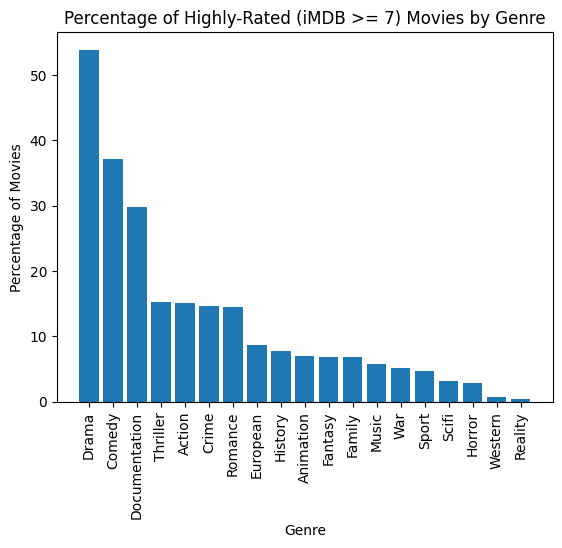

In [51]:
# Movie Genres
genres = [g["word"].capitalize() for g in sorted_movie_data]
x_axis = np.arange(len(genres))
counts = [(g["count"] / total_movies) * 100 for g in sorted_movie_data]
plt.bar(x_axis, counts)
plt.xticks(x_axis, genres, rotation=90)
plt.title(f"Percentage of Highly-Rated (iMDB >= {min_rating}) Movies by Genre")
plt.xlabel("Genre")
plt.ylabel("Percentage of Movies")
plt.show()

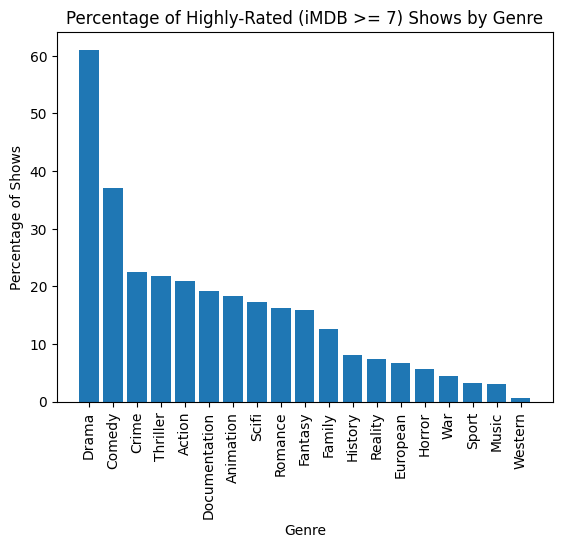

In [53]:
# Show Genres
genres = [g["word"].capitalize() for g in sorted_show_data]
x_axis = np.arange(len(genres))
counts = [(g["count"] / total_shows) * 100 for g in sorted_show_data]
plt.bar(x_axis, counts)
plt.xticks(x_axis, genres, rotation=90)
plt.title(f"Percentage of Highly-Rated (iMDB >= {min_rating}) Shows by Genre")
plt.xlabel("Genre")
plt.ylabel("Percentage of Shows")
plt.show()